# Introduction to Unsupervised Learning & K-Means Clustering


## Table of Contents

### 1. Supervised Learning VS Unsupervised Learning

### 2. Clustering Algorithms Overview

### 3. Pipeline for Building ML Model

### 4. K-Means Clustering

### 5. Important Considerations for K-Means

## 1. Supervised Learning VS Unsupervised Learning

- In supervised learning (prediction), we are given labeled examples and asked to learn a mapping from inputs to known outputs.

- In unsupervised learning, we work with data without known labels or outcomes. Instead, The goal is is about exploration and understanding by finding patterns and groups in the data

#### Common unsupervised learning tasks:

- Clustering → A type of unsupervised learning. Group similar items together. Items in the same cluster are more similar to each other than to items in other clusters.
    
    Applications:

    1. Customer segmentation (Example: A bank wants to segment customers to tailor marketing campaigns. Clustering can reveal groups with similar behaviors without having pre-defined labels.)

    2. Anomaly detection (fraud, manufacturing defects)

    3. Grouping similar documents or images
    

- Dimensionality reduction → Reducing features while keeping important information

#### Typical questions unsupervised learning:

- Are there natural groupings in the data?

- Which data points are similar or different?

- Can we summarize complex data more simply?

####Why Clustering Is Harder Than It Looks

- Clustering has no single correct answer

- There is no ground truth label to validate against

- Different algorithms may produce different groupings yet reasonable, groupings

- Results depend heavily on data preparation and assumptions

This means that interpretation and domain knowledge matter more than raw model output.

## 2. Clustering Algorithms Overview

 We will cover the following popular clustering algorithms:
 - K-Means (Lab 1)
 - Agglomerative Clustering (Lab 2)
 - DBSCAN (Density-Based) (Lab 2)

## 3. Pipeline for Building ML Model

    Data Collection → Preprocessing → Algorithm Selection → Model Training → Evaluation & Interpretation → Iterate → Use the Model

#### Step 1: Define the Goal: Segment customers for marketing campaigns

#### Step 2: Data Collection & Exploration

- Collect relevant data

- Explore the data:

    - How many features? Which are categorical vs numerical?

    - Are there missing values or outliers?

    - What does the distribution of features look like?

#### Step 3: Data Preprocessing (covered in Data Engineering)

- Handle missing values if any

- Encode categorical features (e.g., one-hot encoding)

- Scale numeric features — distances matter in clustering, so features must be comparable

#### Step 4: Choose the Algorithm


#### Step 5: Fit the Model: train the model on the preprocessed data

#### Step 6: Evaluate & Interpret

#### Step 7: Iterate

- Try different preprocessing, feature selection or algorithms

- Evaluate results and refine.

#### Step 8: Use the Model


## 4. K-Means Clustering

### Intuition

- Choose K (number of clusters).

- Randomly place K centroids (cluster centers).

- Assign each data point to the nearest centroid.

- Update centroids as the mean of points in each cluster.

- Repeat until convergence criteria is met


### A simple 2D example

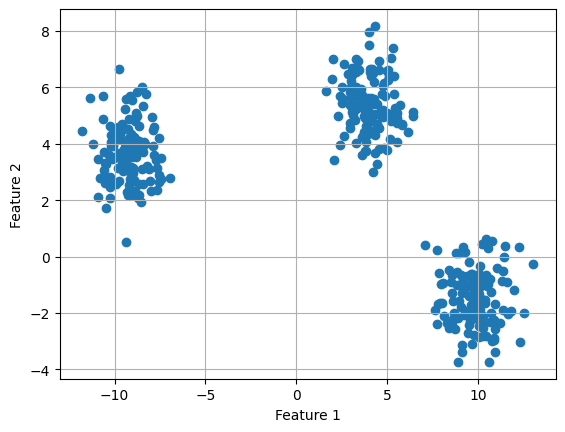

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate 400 data points in a 2D space, grouped into 3 clusters.
X,y = make_blobs(n_samples = 400,n_features = 2,centers = 3)

fig = plt.figure(0)
plt.grid(True)

# plot the dataset in 2D, showing all the points.
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
# displays the plot
plt.show()

### Random Initialization

- The algorithm chooses initial centroids randomly.

- This means different runs can produce different clusters.

### Convergence Criteria

K-Means will stop iterating when either of these happens:

- Assignments stop changing: Each point is assigned to the same cluster as in the previous iteration.

- Centroids stop moving: The mean of points in each cluster does not change significantly.


In [ ]:
from sklearn.cluster import KMeans

# Create a KMeans model
# We know there are 3 clusters in the data, so we set n_clusters=3

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

# compute centroids from X
centroids = kmeans.cluster_centers_
print("Centroids:\n", kmeans.cluster_centers_)

Centroids:
 [[ 9.83582354 -1.46987741]
 [-9.22687561  3.71910475]
 [ 4.00410533  5.39899962]]


### Creating and Fitting a KMeans Model

Note of our method choices here:

- fit(): Compute the cluster centroids from the data. No labels returned. This is training

- predict()	Assign points to the nearest centroid from the trained model. No centroid update.

- fit_predict() : shortcut for fit() and predict(), returning cluster labels

- fit_transform(): Fit the model and return the distance of each point to all cluster centroids




### K-Means Initialization in Scikit-Learn
By default, KMeans uses init='k-means++'.

- This means the initial centroids are not completely random, they are chosen smartly to be far apart, which helps:

  - Convergence faster (less iterations needed)

  - Better clustering results (lower chance of poor clustering)

- Even with k-means++, because centroids are still randomly seeded, you can get slightly different clusters in different runs. To reduce variability, we can set **random_state** ensures reproducible results.

- Still, K-Means can give different results on different runs if the clusters are not clearly separated.   

  - **n_init** parameter tells K-Means how many times to run the algorithm with different random initial centroids.

  - For each run, K-Means calculates the Sum of Squared Distances (SSD) (a measure of how tightly points are grouped around their cluster centroids)

  - After all runs, K-Means keeps the clustering with the lowest SSD, which usually represents the most compact and meaningful grouping.

In [ ]:
# Inspect the cluster labels
print(labels[:10])  # show first 10 labels

[2 0 1 0 2 2 0 1 0 2]


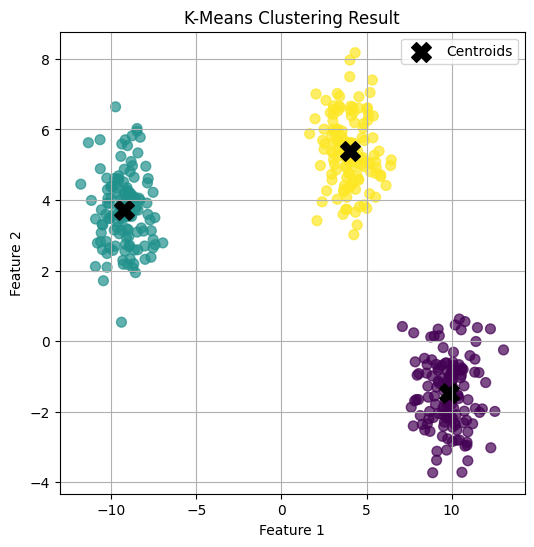

In [ ]:
plt.figure(figsize=(6,6))

# Plot the data points
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50, alpha=0.7)

# Plot the centroids as large black X's
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Result")

plt.legend()
plt.grid(True)
plt.show()

### Why we need to choose K carefully

- In the previous example, we already knew there were 3 clusters.

- In real-world datasets, we don’t know how many clusters exist.

  - Choosing the wrong K can lead to:

  - Too few clusters: different groups are merged together -> lose important distinctions

  - Too many clusters: split natural groups unnecessarily -> overcomplicate analysis

### So we need strategies to pick it wisely:
  ### Solution: Elbow Method

#### The Elbow Method

It helps determine K by looking at how the Sum of Squared Distances (SSD) changes as we increase K.
SSD measures how close points are to their cluster centroids

Steps:

- Run K-Means for different values of K (e.g., 1–10)

- Record the SSD for each K

- Plot SSD vs. K

- Look for the “elbow”, the point where adding more clusters doesn’t significantly reduce SSD

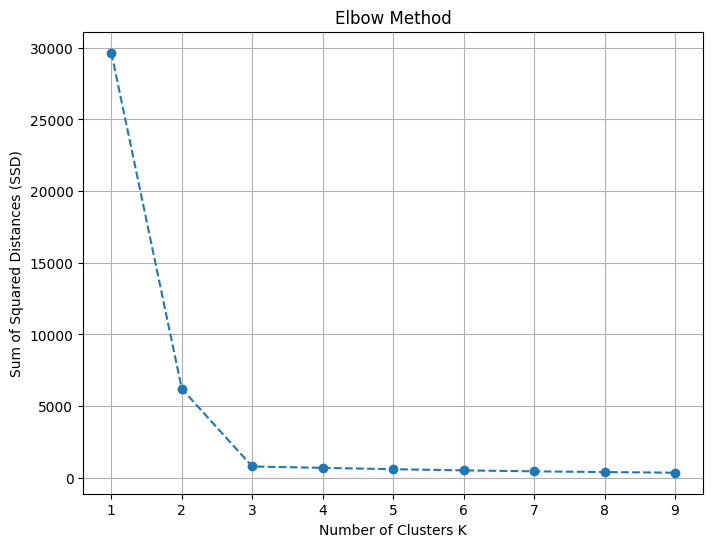

In [ ]:
ssd = []
K_range = range(1,10)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X)
    ssd.append(km.inertia_)  # Sum of Squared Distances

# Plot SSD vs K
plt.figure(figsize=(8,6))
plt.plot(K_range, ssd, 'o--')
plt.xlabel("Number of Clusters K")
plt.ylabel("Sum of Squared Distances (SSD)")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

Observation:

- The “elbow” point: the K where adding more clusters doesn’t significantly reduce SSD.

- In this example, the elbow is clearly at K=3, which matches the true number of clusters.

### Assessing Clustering Quality:

- Visualization:

  In real-world datasets, we can’t visualize clusters (more than 2–3 features). We need numerical metrics to assess clustering quality.

### Solution: Silhouette Score

It measures how well each point fits its cluster compared to other clusters:

     s = (b-a) / max(a,b)

    Where:

    a = average distance to other points in the same cluster

    b = average distance to points in the nearest other cluster

### Score ranges: [-1,1]

#### 1) High Score (Close to 1) == ( b >> a )

the point is much closer to points in its own cluster than to points in the nearest other cluster

Intuition: The point is well-clustered and clearly belongs to this cluster

#### 2)  Score Around 0 == ( b ≈ a )

the point is roughly equally close to its own cluster and the nearest other cluster

Intuition: The point is on the border between clusters

#### 3)  Negative Score (Less than 0) == ( a > b )

the point is closer to a different cluster than to its own cluster

Intuition: The point is probably assigned to the wrong cluster

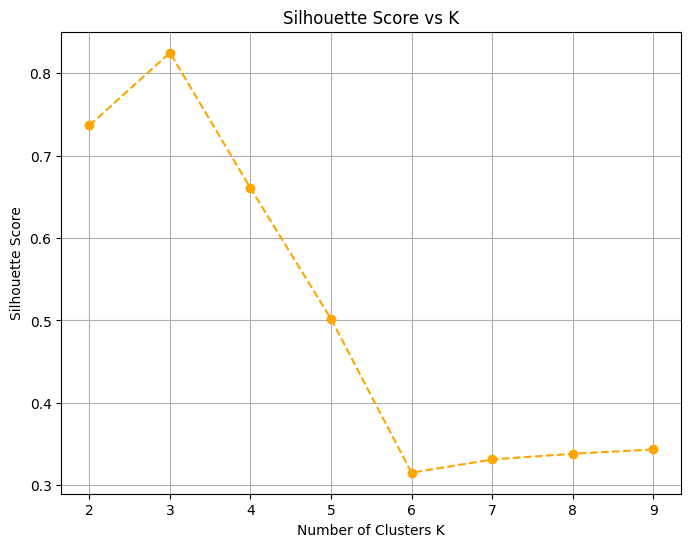

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    # fit K-Means and assign each point to a cluster
    labels = km.fit_predict(X)

    # average Silhouette Score for all points
    score = silhouette_score(X, labels)

    sil_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8,6))
plt.plot(range(2,10), sil_scores, 'o--', color='orange')
plt.xlabel("Number of Clusters K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs K")
plt.grid(True)
plt.show()

## 5. Important Considerations for K-Means

#### When to Use K-Means

1. Numeric features: K-Means relies on distance between points, so it works best with numerical data.

2. Well-separated clusters: Works well if clusters are roughly spherical and similar in size.

3. Exploratory analysis: Great for segmenting customers, grouping items or finding patterns in data where labels aren’t availablea dn the centroids give a summary of each cluster.

#### Limitations of K-Means

1. Sensitive to scale: features with larger ranges dominate distance calculations -> scaling features

2. Needs K (number of clusters) upfront: Choosing K incorrectly can lead to meaningless clusters

3. Sensitive to outliers: Outliers can shift centroids dramatically -> Consider removing outliers or using another clustering methods.

4. Assumes spherical clusters: Struggles with clusters of different shapes or densities -> Use alternative algorithms like DBSCAN or hierarchical clustering for irregular shapes.

5. Works best with well-separated spherical clusters.